In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv(r"C:\Users\Vish\Desktop\ExcelR\Assignments\Linear Regression\Multiple Linear Regression\50_Startups.csv")

df.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New_York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New_York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Business Moments

In [14]:
df.mean()

RnD_Spend           76643.6556
Administration     121344.6396
Marketing_Spend    223788.0578
Profit             112012.6392
dtype: float64

In [15]:
df.median()

RnD_Spend           73522.780
Administration     122699.795
Marketing_Spend    213675.405
Profit             107978.190
dtype: float64

In [16]:
df.std()

RnD_Spend           43318.486111
Administration      28017.802755
Marketing_Spend    109829.202198
Profit              40306.180338
dtype: float64

In [17]:
df.var()

RnD_Spend          1.876491e+09
Administration     7.849973e+08
Marketing_Spend    1.206245e+10
Profit             1.624588e+09
dtype: float64

# EDA 

In [18]:
df.describe() #Finds Min, Max and the 25th 50th and 75% of the data.

,RnD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,76643.655600,121344.639600,223788.057800,112012.639200
std,43318.486111,28017.802755,109829.202198,40306.180338
min,542.050000,51283.140000,1903.930000,14681.400000
25%,46117.032500,103730.875000,142431.385000,90138.902500
50%,73522.780000,122699.795000,213675.405000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [19]:
df.info() #dtypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RnD_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [20]:
df.isnull().sum() #looking for null values in our dataset

RnD_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

# Data Visualization

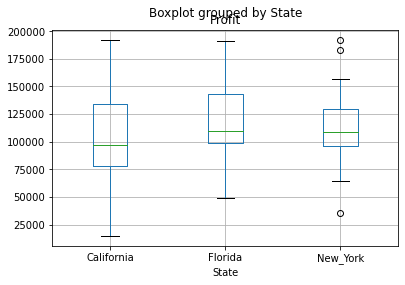

In [21]:
df.boxplot(by='State', column=['Profit'], grid=True) #Profit with respect to each state.

<li>California and Florida have more distributed values than Newyork. 
<li>Which means that the Profit margin within California and Florida is more.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021950D326D0>,
      dtype=object)

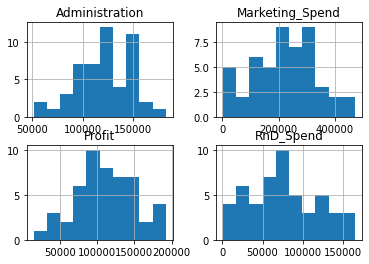

In [22]:
df.hist() #histogram for all variables

We can observe that all dataset is <B> Normally distributed.

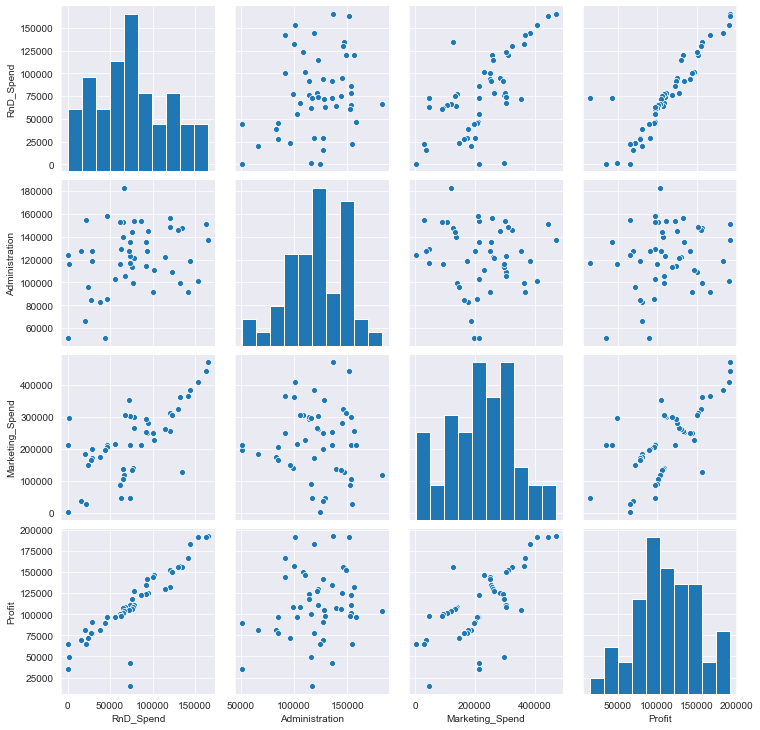

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(df) #pairplot for all the variables.

There aren't any colinear features.

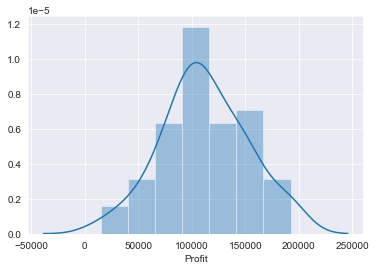

In [24]:
import seaborn as sns

sns.distplot(df['Profit']) #distribution plots for Profit

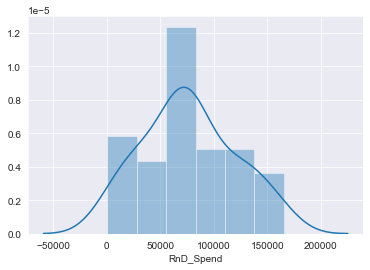

In [25]:
sns.distplot(df['RnD_Spend']) # distribution plots for RnD Spend

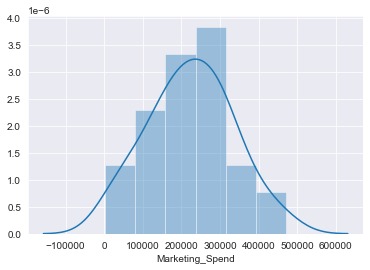

In [26]:
sns.distplot(df['Marketing_Spend']) # distribution for Marketing spend

The data seems distributed normally for all the features.

In [27]:
df.drop(["State"], inplace=True, axis=1) #dropping State

In [28]:
df.head() 

,RnD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Correlation Matrix

In [29]:
df.corr() #correlation within variables

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.268328,0.672626,0.888520
Administration,0.268328,1.000000,-0.068743,0.200717
Marketing_Spend,0.672626,-0.068743,1.000000,0.700191
Profit,0.888520,0.200717,0.700191,1.000000


RnD_Spend and marketing_spend are positively correlated with other. We can use these two in our Model.

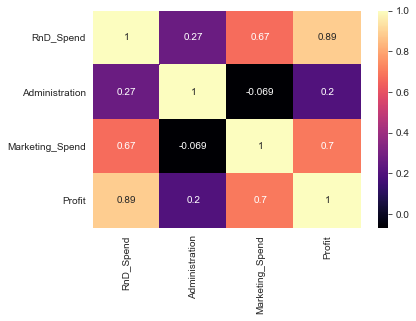

In [30]:
#Heatmap for visual correlation

sns.heatmap(df.corr(), annot=True, cmap='magma')

<li>We can observe that the independent variables **Marketing_Spend and RnD_Spend** are correlated with each other. 
<li>We can also observe that the independent variables **Marketing Spend and RnD_Spend** are positively correlated with our dependent variable <B> Profit.
<li>Therefore we can use these two independent variables for out multiple linear Regression model.

# Model 1: Statsmodel

In [31]:
#Building model

import statsmodels.formula.api as smf


X=df[['RnD_Spend','Marketing_Spend']]


In [32]:
model= smf.ols('Profit~RnD_Spend+Marketing_Spend',data=df).fit()

In [33]:
#Coefficients
model.params

Intercept          42251.218651
RnD_Spend              0.709524
Marketing_Spend        0.068730
dtype: float64

In [34]:
#t and p-Values
print(model.tvalues, '\n','\n', model.pvalues)

Intercept          7.055712
RnD_Spend          8.844065
Marketing_Spend    2.172068
dtype: float64 
 
 Intercept          6.728846e-09
RnD_Spend          1.444627e-11
Marketing_Spend    3.492905e-02
dtype: float64


In [35]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8086735310196198, 0.8005319791481142)

### Predicting for new data

In [36]:
#New data for prediction
new_data=pd.DataFrame({'RnD_Spend':1111111,"Marketing_Spend":1111111},index=[1])

In [37]:
model.predict(new_data)

1    906977.842602
dtype: float64

In [38]:
model.predict(df.iloc[0:5,])

0    191996.070554
1    188127.248266
2    179158.915206
3    171024.144882
4    168246.473785
dtype: float64

# Model2: Log transformation

In [39]:
model2 = smf.ols("Profit~np.log(RnD_Spend)+np.log(Marketing_Spend)" , data = df).fit()

In [40]:
#Coefficients
model2.params

print(model2.tvalues,'\n','\n', model2.pvalues)

Intercept                 -4.104888
np.log(RnD_Spend)          4.819187
np.log(Marketing_Spend)    2.103490
dtype: float64 
 
 Intercept                  0.000160
np.log(RnD_Spend)          0.000015
np.log(Marketing_Spend)    0.040802
dtype: float64


In [41]:
#t and p-Values
print(model2.tvalues, '\n','\n', model2.pvalues)

Intercept                 -4.104888
np.log(RnD_Spend)          4.819187
np.log(Marketing_Spend)    2.103490
dtype: float64 
 
 Intercept                  0.000160
np.log(RnD_Spend)          0.000015
np.log(Marketing_Spend)    0.040802
dtype: float64


In [42]:
#R squared values
(model2.rsquared , model2.rsquared_adj)

(0.520919798737786, 0.5005334071947131)

In [43]:
#New data for prediction
new_data2=pd.DataFrame({'RnD_Spend':10.015815,"Marketing_Spend":10.064277},index=[1])

In [44]:
model2.predict(new_data2)

1   -158572.102691
dtype: float64

In [45]:
model2.predict(df.iloc[0:5,])

0    143848.481600
1    142862.761176
2    140835.825708
3    138992.490335
4    138194.316663
dtype: float64

# Model 3 - Sqrt tranfromation

In [46]:
model3 = smf.ols("Profit~np.sqrt(RnD_Spend)+np.sqrt(Marketing_Spend)" , data = df).fit()

In [47]:
#Coefficients
model3.params

Intercept                  -1294.609987
np.sqrt(RnD_Spend)           304.749910
np.sqrt(Marketing_Spend)      74.181106
dtype: float64

In [48]:
#t and p-Values
print(model3.tvalues, '\n','\n', model3.pvalues)

Intercept                  -0.120092
np.sqrt(RnD_Spend)          7.788295
np.sqrt(Marketing_Spend)    2.762326
dtype: float64 
 
 Intercept                   9.049223e-01
np.sqrt(RnD_Spend)          5.281895e-10
np.sqrt(Marketing_Spend)    8.164735e-03
dtype: float64


In [49]:
#R squared values
(model3.rsquared , model3.rsquared_adj)

(0.7506715495004218, 0.7400618282025674)

In [50]:
#New data for prediction
new_data3=pd.DataFrame({'RnD_Spend':10.015815,"Marketing_Spend":10.064277},index=[1])

In [51]:
model3.predict(new_data3)

1   -94.81045
dtype: float64

In [52]:
model3.predict(df.iloc[0:5,])

0    173578.748116
1    171014.619868
2    165460.128557
3    160419.710853
4    158475.712259
dtype: float64

# Model4: Sklearn Model

In [1]:
from sklearn.model_selection import train_test_split 

In [54]:
X=df[['RnD_Spend','Marketing_Spend']]
y=df.iloc[:,-1]

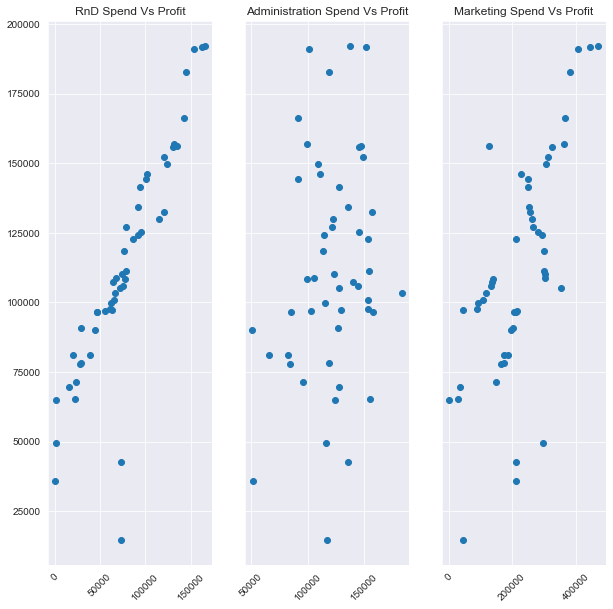

In [55]:
# Ploting all the three features together
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10, 10))

ax1.scatter(df["RnD_Spend"], df.Profit)
ax1.set_title('RnD Spend Vs Profit')

ax2.scatter(df["Administration"], df.Profit)
ax2.set_title('Administration Spend Vs Profit')

ax3.scatter(df["Marketing_Spend"], df.Profit)
ax3.set_title('Marketing Spend Vs Profit')

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.show()

In [56]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=0)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
regressor = LinearRegression() #Regression object created

### Training the model

In [59]:
regressor.fit(X_train, y_train) # Training model

LinearRegression()

In [60]:
from sklearn.metrics import r2_score

#R squared values
print(f'r_sqr value: {regressor.score(X_train, y_train)}')

r_sqr value: 0.7762972013901568


### Predicting Data

In [61]:
y_pred = regressor.predict(X_test) # predicting

In [62]:
y_pred

array([ 95161.71554761, 129496.0598634 , 128815.41905049,  71776.25534407,
       178626.73096225, 117185.50168305,  67947.97311393,  89437.48830899,
       114747.72482754, 167485.6769702 ,  95012.79445098,  87644.79087462,
       102899.57176067,  88334.01119061, 126622.35467996, 155970.21711922,
       143585.22982624])

In [63]:
x_test_new = [[200000, 150000]]

In [64]:
regressor.predict(x_test_new)

array([191943.18646304])

### R sqaure and Predicted values for Model 1, Model 2, Model 3 and Model 4

In [78]:
df2 = pd.DataFrame(np.array([['Model1',80,906977], ['Model2',52,-158572], ['Model3', 75,-94.81045], ['Model4',77,191943]]),
                   columns= ['Model', 'R2_Square','Profit'])

df2.head()

,Model,R2_Square,Profit
0,Model1,80,906977
1,Model2,52,-158572
2,Model3,75,-94.81045
3,Model4,77,191943
